In [62]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

credit_df = pd.read_csv("credit_card.csv")
credit_card_labels = pd.read_csv('credit_card_label.csv')
credit_df = pd.merge(credit_df, credit_card_labels, on="Ind_ID")

In [63]:
credit_df['GENDER'] = credit_df['GENDER'].map({'M':0, 'F':1})
credit_df['Car_Owner'] = credit_df['Car_Owner'].map({'Y':1, 'N':0})
credit_df['Propert_Owner'] = credit_df['Propert_Owner'].map({'Y':1, 'N':0})
credit_df['Type_Income'] = credit_df['Type_Income'].map({'Working':1, 'Commercial associate':2,
                                                        'Pensioner':3, 'State servant':4})
credit_df['EDUCATION'] = credit_df['EDUCATION'].map({'Academic degree':1,'Incomplete higher':2,
                                                    'Lower secondary':3,'Secondary / secondary special':4,
                                                    'Higher education':5})
credit_df['Marital_status'] = credit_df['Marital_status'].map({'Married':1, 'Single / not married':2,
                                                            'Civil marriage':3,'Separated':4,
                                                            'Widow':5})
credit_df['Housing_type'] = credit_df['Housing_type'].map({'House / apartment':1, 'With parents':2,
                                                        'Rented apartment':3,'Municipal apartment':4,
                                                        'Co-op apartment':5,'Office apartment':6})
credit_df['Type_Occupation'] = credit_df['Type_Occupation'].map({'Core staff':1,'Cooking staff':2,
                                                            'Laborers':3,'Sales staff':4,'Accountants':5,
                                                                'High skill tech staff':6,'Managers':7,
                                                            'Cleaning staff':8,'Drivers':9,
                                                            'Low-skill laborers':10,'IT staff':11,
                                                            'Waiters/barmen staff':12,'Security staff':13,
                                                            'Medicine staff':14,'Private service staff':15,
                                                            'HR staff':16,'Secretaries':17,'Realty agents':18})
credit_df['Type_Occupation'] = credit_df['Type_Occupation'].fillna(credit_df['Type_Occupation'].mean())

credit_df['GENDER'] = credit_df['GENDER'].fillna(credit_df['GENDER'].mean())

credit_df['Birthday_count'] = credit_df['Birthday_count'].div(-365)
credit_df['Birthday_count'] = credit_df['Birthday_count'].round(2)
credit_df['Birthday_count'] = credit_df['Birthday_count'].fillna(credit_df['Birthday_count'].mean())

credit_df['Employed_days'] = credit_df['Employed_days'].replace(365243,0)
credit_df['Employed_days'] = credit_df['Employed_days']*(-1)

credit_df['Annual_income'] = credit_df['Annual_income'].fillna(credit_df['Annual_income'].mean())
# 0 means unemployed
# credit_df['Birthday_count'].fillna(0)

In [64]:
credit_df

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,0.0,1,1,0,180000.00000,3,5,1,1,51.430000,0,1,0,0,0,5.346337,2,1
1,5009744,1.0,1,0,0,315000.00000,2,5,1,1,37.140000,586,1,1,1,0,5.346337,2,1
2,5009746,1.0,1,0,0,315000.00000,2,5,1,1,43.946094,586,1,1,1,0,5.346337,2,1
3,5009749,1.0,1,0,0,191399.32623,2,5,1,1,37.140000,586,1,1,1,0,5.346337,2,1
4,5009752,1.0,1,0,0,315000.00000,2,5,1,1,37.140000,586,1,1,1,0,5.346337,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,1.0,0,1,0,191399.32623,2,5,1,1,32.760000,2182,1,0,0,0,7.000000,2,0
1544,5023655,1.0,0,0,0,225000.00000,2,2,2,1,28.020000,1209,1,0,0,0,5.000000,1,0
1545,5115992,0.0,1,1,2,180000.00000,1,5,1,1,36.090000,2477,1,0,0,0,7.000000,4,0
1546,5118219,0.0,1,0,0,270000.00000,1,4,3,1,41.900000,645,1,1,1,0,9.000000,2,0


In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = credit_df.drop('label', axis=1)
y = credit_df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=13,
                                                    stratify=y)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

model = LogisticRegression(random_state=13, class_weight='balanced').fit(X_train, y_train)

y_predicted = model.predict(X_test)

print(model.score(X_test, y_test))

0.6172043010752688


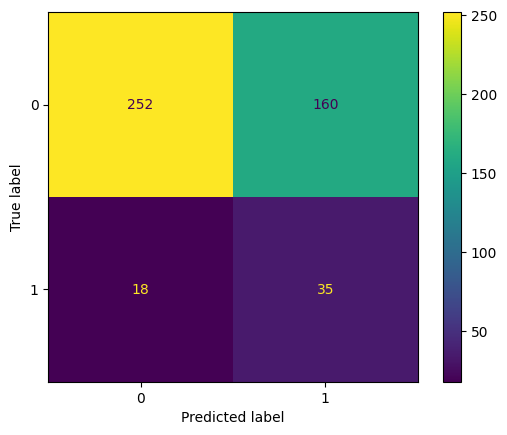

In [66]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_predicted)

In [72]:
from sklearn.decomposition import PCA

pca = PCA(n_components=6)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.fit_transform(X_test)

model = LogisticRegression(random_state=13, class_weight='balanced').fit(X_train_pca, y_train)

model.score(X_test_pca, y_test)

0.5634408602150538

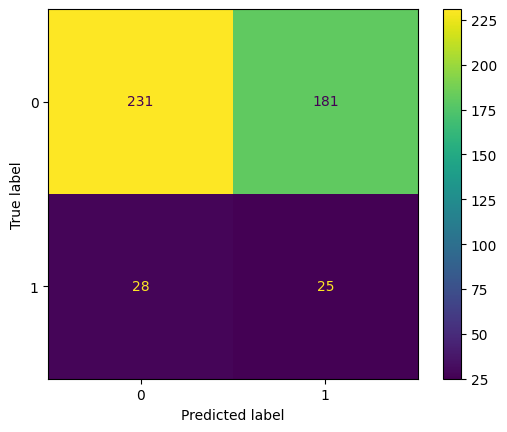

In [68]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model, X_test_pca, y_test)

I used the dimensionality reduction PCA which performs dimensionality reduction with "singular value decomposition of the data to project it to a lower space". It brought down the model score by a bit, from 0.61 to 0.56. It might not be performing that well because it's keeping a lot of components that might have a lot of variance.